## Pandas绘图

- Series和DataFrame都有一个用于生成各类图表的plot方法
- Pandas的绘图是基于Matplotlib， 可以快速实现基本图形的绘制，复杂的图形还是需要用Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

常见可视化图形:

- 折线图
- 条形图/柱形图
- 饼图
- 散点图
- 箱型图
- 面积图
- 直方图


### 折线图

#### Series图表

<AxesSubplot:>

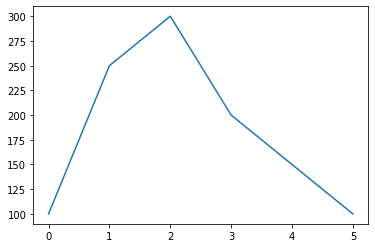

In [2]:
s = pd.Series([100, 250, 300, 200, 150, 100])
s
s.plot()

- 画正弦曲线

<AxesSubplot:>

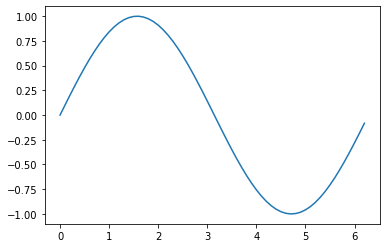

In [3]:
# sin曲线
x = np.arange(0, 2*np.pi, 0.1)
x

y = np.sin(x)

s = pd.Series(data=y, index=x)
s

s.plot()

DataFrame图表

- 图例的位置可能会随着数据的不同而不同

In [4]:
data = np.random.randint(50, 100, size=(5, 6))
index = ['1st', '2nd', '3th', '4th', '5th']
columns = ['Jeff', 'Jack', 'Rose', 'Lucy', 'Lily', 'Bob']

df = pd.DataFrame(data=data, index=index, columns=columns)
df

,Jeff,Jack,Rose,Lucy,Lily,Bob
1st,53,65,87,69,53,72
2nd,96,50,60,75,69,98
3th,95,90,92,78,96,79
4th,55,92,56,82,82,80
5th,79,65,65,80,77,56


<AxesSubplot:>

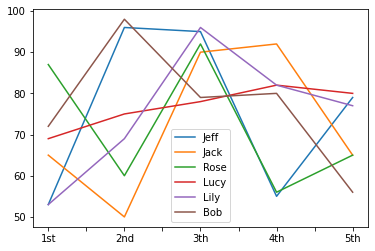

In [5]:
# 每一列 一根线
df.plot()

# 每一行 一根线
# df.T.plot()

### 条形图和柱状图

Series柱状图示例,kind = 'bar'/'barh'

<AxesSubplot:>

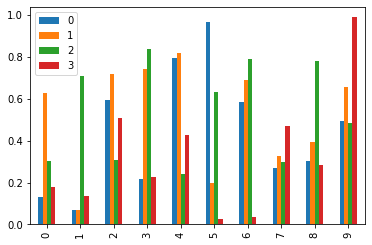

In [6]:
df = pd.DataFrame(data=np.random.rand(10, 4))
df.plot(kind='bar')  # 第一种方式
# df.plot.bar()  # 第二种方式
# df.plot.bar(stacked=True)  # 堆叠

<AxesSubplot:>

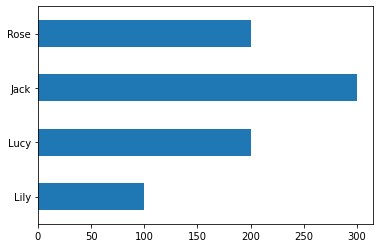

In [7]:
s = pd.Series(data=[100, 200, 300, 200])
s.index = ['Lily', 'Lucy', 'Jack', 'Rose']
# s.plot(kind='bar')  # 柱状图
s.plot(kind='barh')  # 水平：条形图


# kind : str
#     The kind of plot to produce:
#     - 'line' : line plot (default)
#     - 'bar' : vertical bar plot
#     - 'barh' : horizontal bar plot
#     - 'hist' : histogram
#     - 'box' : boxplot
#     - 'kde' : Kernel Density Estimation plot
#     - 'density' : same as 'kde'
#     - 'area' : area plot
#     - 'pie' : pie plot
#     - 'scatter' : scatter plot
#     - 'hexbin' : hexbin plot.

DataFrame柱状图示例

In [8]:
data = np.random.randint(0, 100, size=(4, 3))
index = list("ABCD")
columns = ['Python', 'C', 'Java']

df = pd.DataFrame(data=data, index=index, columns=columns)
df

,Python,C,Java
A,70,70,20
B,24,56,97
C,81,47,77
D,7,50,56


<AxesSubplot:>

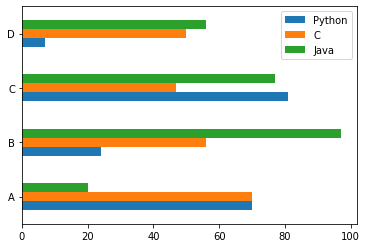

In [9]:
# df.plot(kind='bar')
df.plot(kind='barh')

#### 聚会规模可视化项目：

- 读取文件tips.csv，查看每天各种聚会规模的比例  
- 求和 df.sum()，注意灵活使用axis
- df.div(): 获取数dataframe和其他元素的浮点除法

In [10]:
tips = pd.read_csv('data/tips.csv')
tips

,day,1,2,3,4,5,6
0,Fri,1,16,1,1,0,0
1,Stat,2,53,18,13,1,0
2,Sun,0,39,15,18,3,1
3,Thur,1,48,4,5,1,3


把day作为行索引

In [11]:
tips2 = tips.set_index('day')
tips2

,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Stat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


求每天的聚会规模

In [12]:
day_sum = tips2.sum(axis=1)
day_sum

day
Fri     19
Stat    87
Sun     76
Thur    62
dtype: int64

每天各种聚会规模的比例

In [13]:
tips3 = tips2.div(day_sum, axis=0)
tips3

,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Stat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


<AxesSubplot:xlabel='day'>

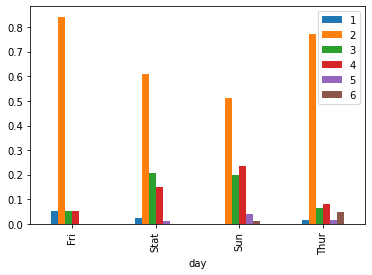

In [14]:
tips3.plot(kind='bar')

### 直方图

rondom生成随机数百分比直方图，调用hist方法

- 柱高表示数据的频数，柱宽表示各组数据的组距
- 参数bins可以设置直方图方柱的个数上限，越大柱宽越小，数据分组越细致
- 设置density参数为True，可以把频数转换为概率

<AxesSubplot:ylabel='Frequency'>

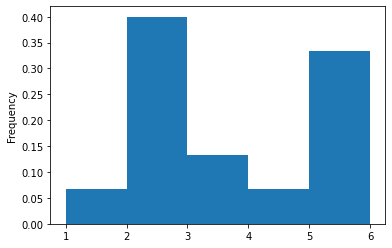

In [15]:
s = pd.Series([1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 5, 5, 5, 6, 6])

# 直方图
# bins=4 表式4个组
# density: 频数转换为概率
s.plot(kind='hist', bins=5, density=True)

kde图：核密度估计，用于弥补直方图由于参数bins设置的不合理导致的精度缺失问题

<AxesSubplot:ylabel='Density'>

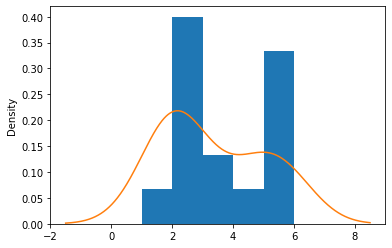

In [16]:
# kde图：核密度估计
s.plot(kind='hist', bins=5, density=True)

s.plot(kind='kde')  # 可以结合上面的直方图一起显示，效果更好

### 饼图

array([<AxesSubplot:ylabel='Python'>, <AxesSubplot:ylabel='Java'>],
      dtype=object)

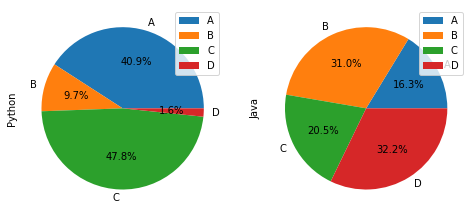

In [17]:
df = pd.DataFrame(data=np.random.rand(4, 2), 
                             index=list('ABCD'),
                              columns=['Python', 'Java']
                 )
df

# 画饼图
# df['Python'].plot(kind='pie', autopct='%.1f%%')

# subplots: 子图
df.plot.pie(subplots=True, figsize=(8, 8), autopct='%.1f%%')

# pandas画图：快速画简单的图
# 复杂的图可以用matplotlib

### 散点图

- 散点图是观察两个一维数据数列之间的关系的有效方法,DataFrame对象可用 


In [18]:
data = np.random.normal(size=(1000, 2))
data

df = pd.DataFrame(data=data, columns=list('AB'))
df.head()

,A,B
0,-0.880271,0.163450
1,-0.104002,-1.068641
2,0.980851,-0.744276
3,-0.627371,-0.525517
4,1.345248,1.477663


<AxesSubplot:xlabel='A', ylabel='B'>

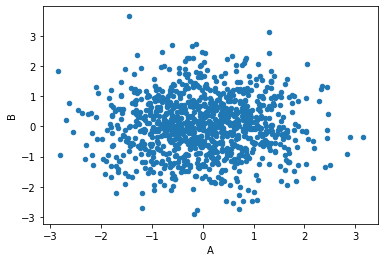

In [19]:
# df.plot(kind='scatter', x='A', y='B')

# x='A' : 使用A列作为X轴
# y='B' : 使用B列作为Y轴
df.plot.scatter(x='A', y='B')

### 面积图

<AxesSubplot:>

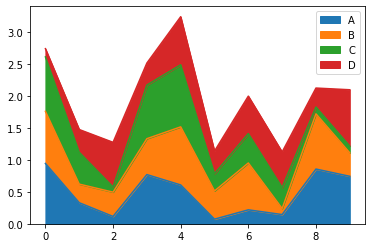

In [20]:
df = pd.DataFrame(data=np.random.rand(10, 4), columns=list('ABCD'))
df

# df.plot(kind='area')
df.plot.area(stacked=True)  # 堆叠

### 箱型图

<AxesSubplot:>

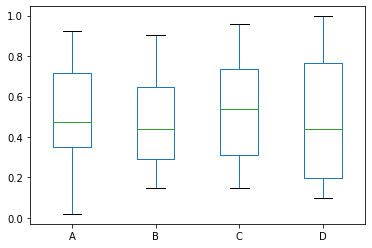

In [21]:
df = pd.DataFrame(data=np.random.rand(10, 4), columns=list('ABCD'))
df

# df.plot(kind='box')
df.plot.box()

#  最大值
#  75%
#  50%
#  25%
#  最小值

# 圆点：表式异常值，离群点